In [1]:
from calendar import c
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from kmeans import Kmeans


Define method to find the elbow of the cost function and to find the best clustering based on the same function

In [2]:
def elbowMethod(dataset, maxClusters, maxIterations, verbose = False):
    costs = []
    for nCen in range(1, maxClusters):
        print("Calculating elbow for kClusters:", nCen)
        clustering, cost = findBestClusering(dataset, nCen, maxIterations, verbose=verbose)
        costs.append(cost)
    plt.plot(np.arange(1, maxClusters), np.array(costs))
    plt.xlabel("K clusters")
    plt.ylabel("Cost function")
    plt.title("Elbow method")
    

def findBestClusering(dataset, kClusters, maxIterations, verbose = True):
    bestClustering = []
    bestCost = float("inf")
    for i in range(maxIterations):
        cl = Kmeans(dataset, kClusters)
        clusters, currCost = cl.clusterize()
        if verbose:
            print("Curr cost:", currCost)
            cl.calcExtValidation()
        if currCost < bestCost:
            bestCost = currCost
            bestClustering = cl
    return bestClustering, bestCost

Prepare the dataset

In [3]:
dataset = pd.read_csv("data/iris.csv")

Find best K-means clustering with k = 3 and 10 iterations max

In [4]:
cl, cost = findBestClusering(dataset, 3, 20, verbose=True)
print("Lowest cost is:", cost)

Curr cost: 1.4540666666666664
Counter({'Setosa': 50, 'Versicolor': 50, 'Virginica': 50})
[32 22 96]
Clusters     0   1   2
Labels                
Setosa      32  18   0
Versicolor   0   4  46
Virginica    0   0  50
Cluster 0 : Setosa
Cluster 2 : Versicolor
Cluster 2 : Virginica

Incorrectly clustered instances: 22
Purity: 0.8533333333333334
Accuracy: 0.7197315436241611
Precision: 0.5513523737469265
Recall: 0.7931972789115646
F score: 0.6505244365097077
Curr cost: 1.4540666666666664
Counter({'Setosa': 50, 'Versicolor': 50, 'Virginica': 50})
[32 96 22]
Clusters     0   1   2
Labels                
Setosa      32   0  18
Versicolor   0  46   4
Virginica    0  50   0
Cluster 0 : Setosa
Cluster 1 : Versicolor
Cluster 1 : Virginica

Incorrectly clustered instances: 22
Purity: 0.8533333333333334
Accuracy: 0.7197315436241611
Precision: 0.5513523737469265
Recall: 0.7931972789115646
F score: 0.6505244365097077
Curr cost: 1.3167333333333335
Counter({'Setosa': 50, 'Versicolor': 50, 'Virginica': 50

Validate the results

Counter({'Setosa': 50, 'Versicolor': 50, 'Virginica': 50})
[63 37 50]
Clusters     0   1   2
Labels                
Setosa       0   0  50
Versicolor  20  30   0
Virginica   43   7   0
Cluster 2 : Setosa
Cluster 1 : Versicolor
Cluster 0 : Virginica

Incorrectly clustered instances: 27
Purity: 0.82
Accuracy: 0.8236241610738255
Precision: 0.7216441207075962
Recall: 0.7548299319727891
F score: 0.7378640776699029
For k clusters = 3 The average silhouette_score is : 0.4847294778770669
[Pandas(_0=7.0, _1=3.2, _2=4.7, _3=1.4), Pandas(_0=5.5, _1=2.3, _2=4.0, _3=1.3), Pandas(_0=5.1, _1=3.5, _2=1.4, _3=0.2)]


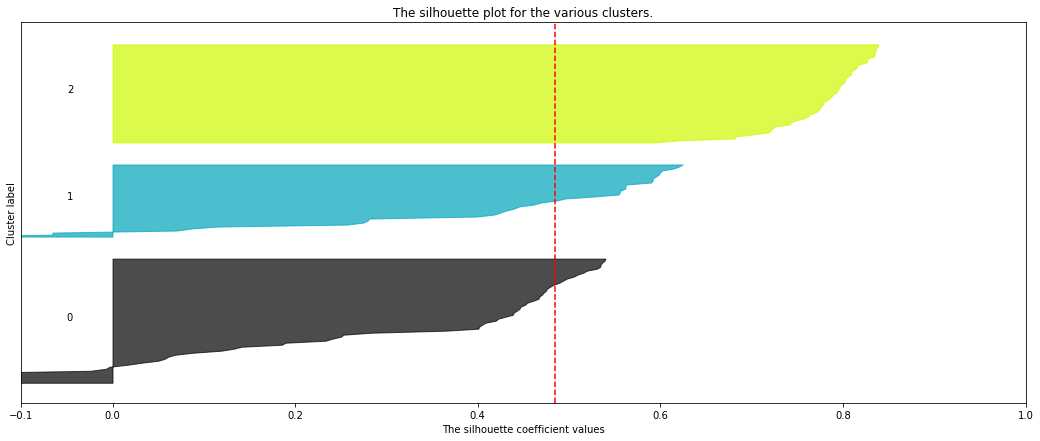

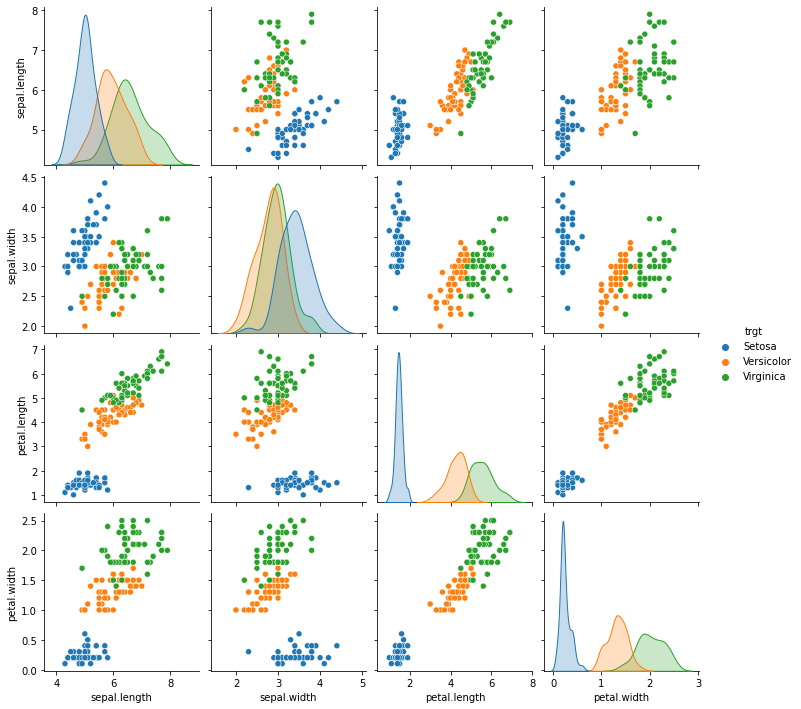

In [5]:
cl.calcExtValidation()
cl.calcPlotSilhouete()
cl.plotScatter()
print(cl.centroids)

Find best K with Elbow method

Calculating elbow for kClusters: 1
Calculating elbow for kClusters: 2
Calculating elbow for kClusters: 3
Calculating elbow for kClusters: 4
Calculating elbow for kClusters: 5


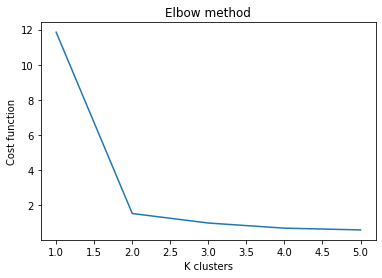

In [6]:
elbowMethod(dataset, 6, 10)

Try different k and print the silhouette

Curr cost: 1.516133333333333
Counter({'Setosa': 50, 'Versicolor': 50, 'Virginica': 50})
[97 53]
Clusters     0   1
Labels            
Setosa       0  50
Versicolor  47   3
Virginica   50   0
Cluster 1 : Setosa
Cluster 0 : Versicolor
Cluster 0 : Virginica

Incorrectly clustered instances: 3
Purity: 0.98
Accuracy: 0.7636689038031319
Precision: 0.5856811402055021
Recall: 0.9616326530612246
F score: 0.7279843444227005
Curr cost: 1.516133333333333
Counter({'Setosa': 50, 'Versicolor': 50, 'Virginica': 50})
[97 53]
Clusters     0   1
Labels            
Setosa       0  50
Versicolor  47   3
Virginica   50   0
Cluster 1 : Setosa
Cluster 0 : Versicolor
Cluster 0 : Virginica

Incorrectly clustered instances: 3
Purity: 0.98
Accuracy: 0.7636689038031319
Precision: 0.5856811402055021
Recall: 0.9616326530612246
F score: 0.7279843444227005
Curr cost: 1.516133333333333
Counter({'Setosa': 50, 'Versicolor': 50, 'Virginica': 50})
[53 97]
Clusters     0   1
Labels            
Setosa      50   0
Versicolor 

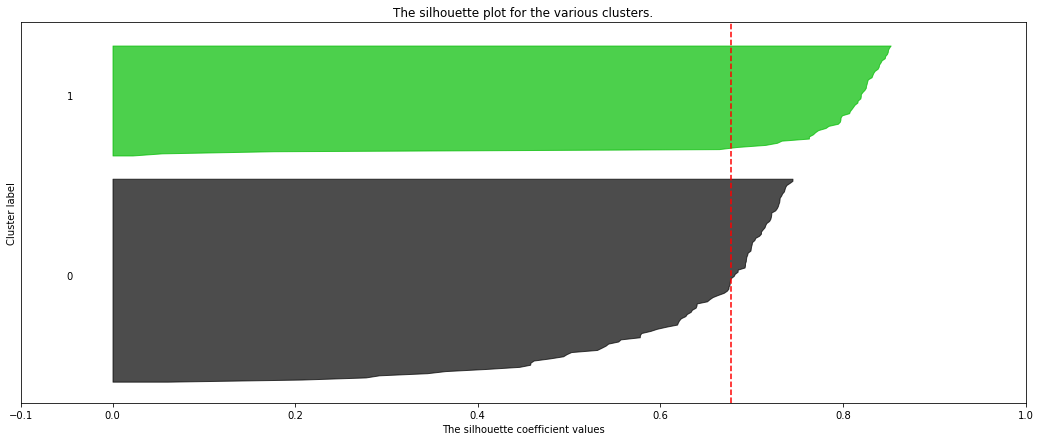

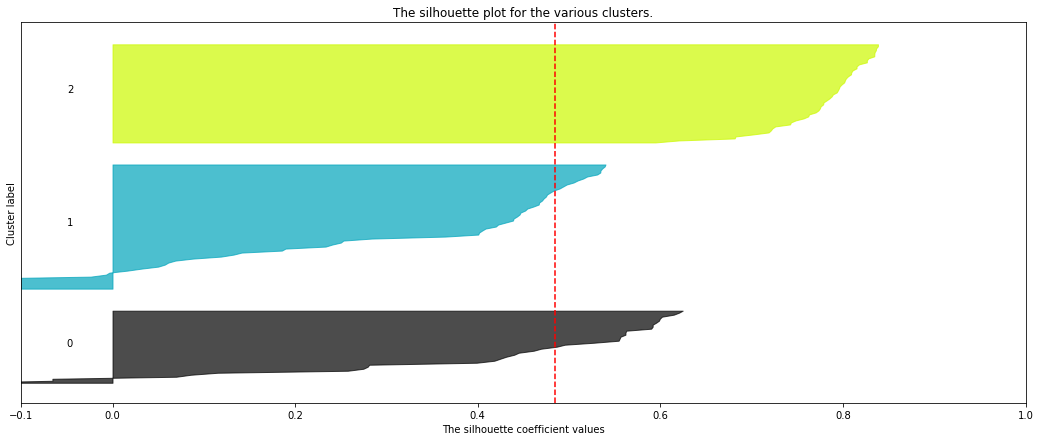

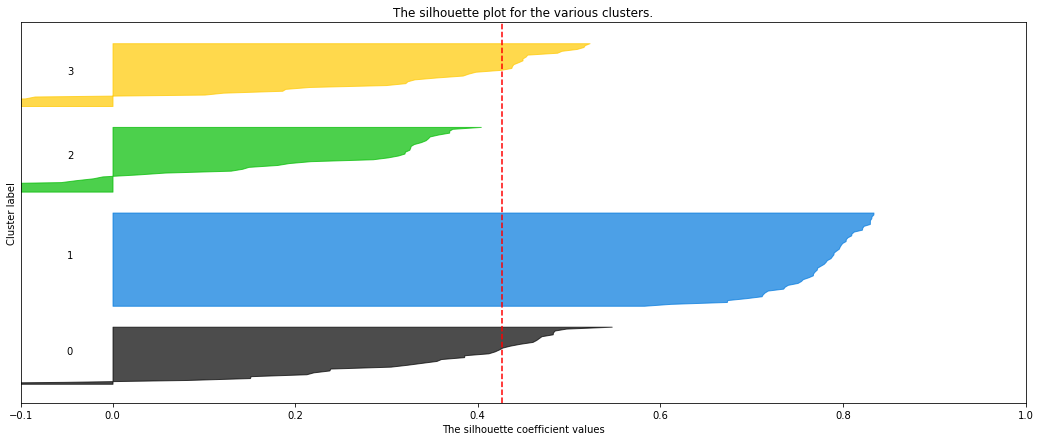

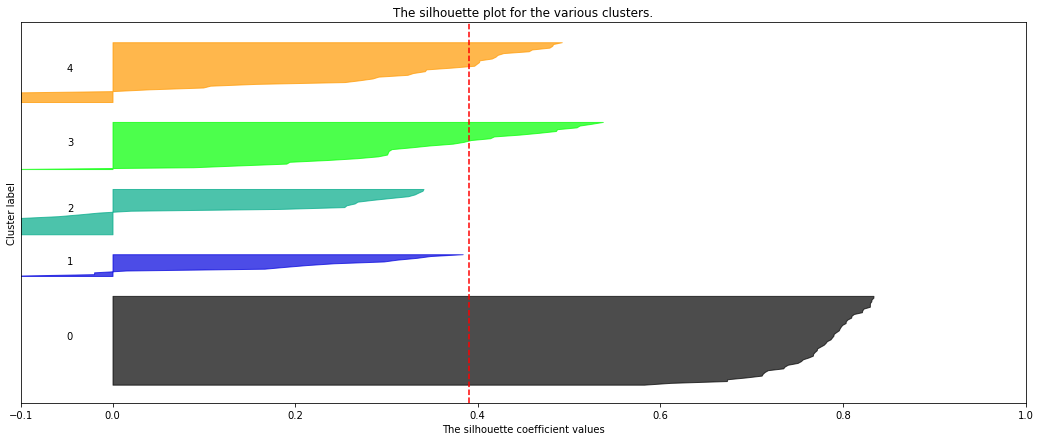

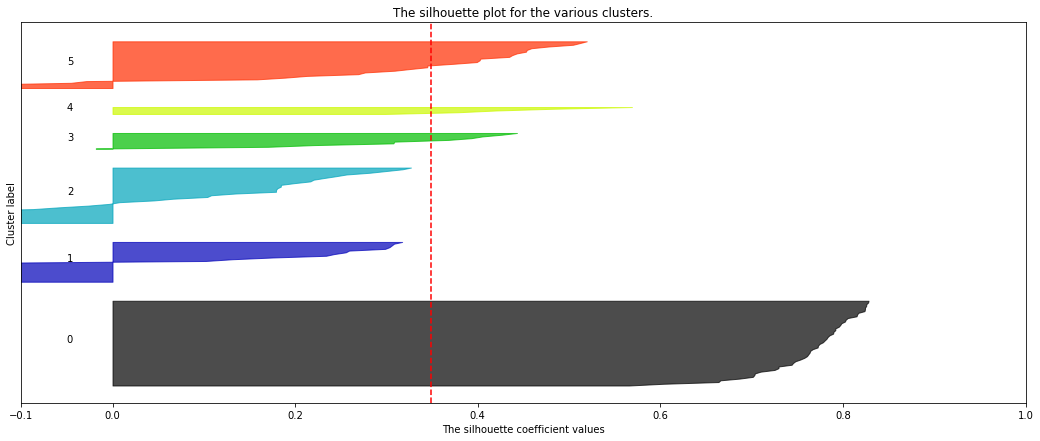

In [7]:
for i in range(2, 6+1):
    cl, cost = findBestClusering(dataset, i, 10)
    print("Lowest cost is:", cost)
    cl.calcPlotSilhouete()
    